## Time Series Analysis: Home Assignment 1

Enter your name below: 

In [39]:
name='Kyrchanov Victor Alexandrovich' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [40]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [41]:
#code here (1 pt.)
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [42]:
# code here (0.5 pt.)
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

# answer
0 missing values in df

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [43]:
# answer (0.5 pt.)
print(df.dtypes)

sales    float64
month      int64
day        int64
year       int64
dtype: object


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [44]:
# code here (0.5 pt.)
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')


Change index to dates:

``` df.index=.... ```

In [45]:
# code here (0.25 pt.)
df.index=df.date

What is the size of the dataset?

use ```.shape```

In [46]:
# code here (0.25 pt.)
print (df.shape)

(147, 5)


(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [47]:
# code here (0.25 pt.)
df=df.drop('day', axis=1)
df=df.drop('year', axis=1)
df=df.drop('month', axis=1)

What is the size of the dataset now?

In [48]:
# code here (0.25 pt.)
print (df.shape)

(147, 2)


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [49]:
# code here (0.25 pt.)
y=df['sales']


```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [50]:
# code here (0.25 pt.)
y=np.flip(y)


Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

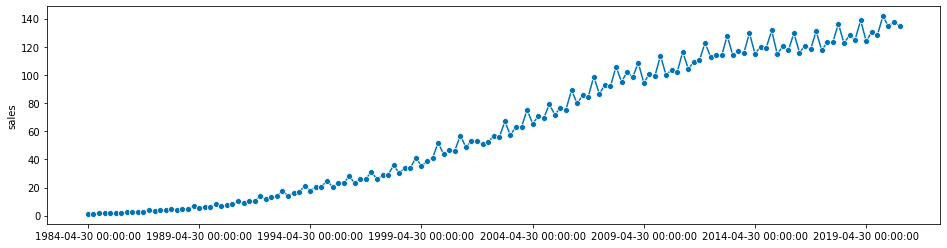

In [51]:
# code here (0.25 pt.)
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [52]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

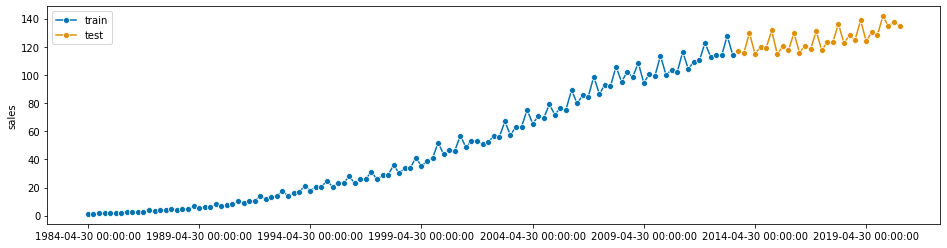

In [53]:
# code here (0.25 pt.)
plot_series(y_train, y_test, labels=['train', 'test'])

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [54]:
# code here (0.5 pt.)
model_MAA=ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA=model_MAA.fit()

C:\Users\Haarteq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [55]:
# code here (0.5 pt.)
model_AAM=ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM=model_AAM.fit()

C:\Users\Haarteq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [56]:
# code here (0.25 pt.)
MAA=fit_MAA.forecast(steps=30)


Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [57]:
# code here (0.25 pt.)
AAM=fit_AAM.forecast(steps=30)

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='simulation'>)

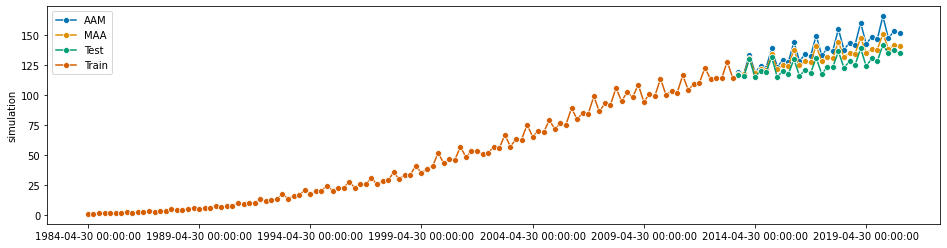

In [58]:
# code here (0.5 pt.)
plot_series(AAM, MAA, y_test, y_train, labels=['AAM', 'MAA', 'Test', 'Train'])


### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [59]:
# code here (0.5 pt.)

pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)
upper_int, lower_int=pred_MAA['pi_upper'], pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='pi_upper'>)

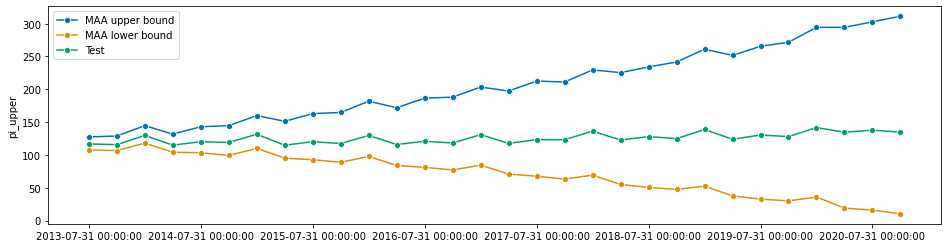

In [60]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int, y_test, labels=['MAA upper bound', 'MAA lower bound', 'Test'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [61]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int, lower_int=pred_AAM['pi_upper'], pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='pi_upper'>)

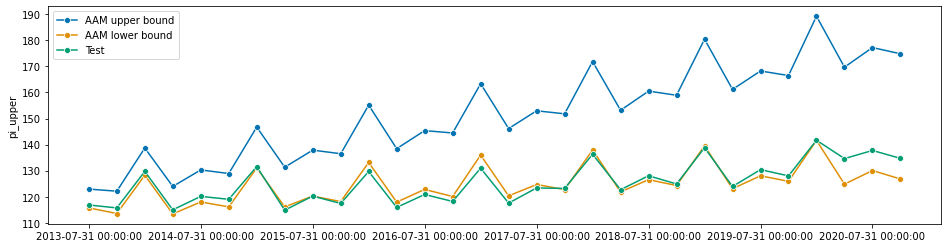

In [62]:
# code here (0.5 pt.)
plot_series(upper_int, lower_int, y_test, labels=['AAM upper bound', 'AAM lower bound', 'Test'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [63]:
# code here (0.5 pt.) MAA
y_pred=pred_MAA['mean']
MAE_MAA=mean_absolute_error(y_test, y_pred)
print(MAE_MAA)

6.394542776164354


In [64]:
# code here (0.5 pt.) AAM
y_pred=pred_AAM['mean']
MAE_AAM=mean_absolute_error(y_test, y_pred)
print(MAE_AAM)

12.709156884386138


$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [65]:
# code here (0.5 pt.) MAA
y_pred=pred_MAA['mean']
MSE_MAA=mean_squared_error(y_test, y_pred)
print(MSE_MAA)

50.571413429308066


In [66]:
# code here (0.5 pt.) AAM
y_pred=pred_AAM['mean']
MSE_AAM=mean_squared_error(y_test, y_pred)
print(MSE_AAM)

195.9700264065846


$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [67]:
# code here (0.5 pt.)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [68]:
# code here (0.25 pt.) MAA
y_pred=pred_MAA['mean']
MAPE_MAA=mean_absolute_percentage_error(y_test, y_pred)
print(MAPE_MAA)

5.091698030053726


In [69]:
# code here (0.25 pt.) AAM
y_pred=pred_AAM['mean']
MAPE_AAM=mean_absolute_percentage_error(y_test, y_pred)
print(MAPE_AAM)

9.993520129367319


### 2.6 What is the best model according to the metrics above? (1 pt.)

In [70]:
# code here (1 pt.)
MAE=pd.DataFrame([
    {'Model':'MAA', 'MAE':MAE_MAA},
    {'Model':'AAM', 'MAE':MAE_AAM},])
MSE=pd.DataFrame([
    {'Model':'MAA', 'MSE':MSE_MAA},
    {'Model':'AAM', 'MSE':MSE_AAM}])
MAPE=pd.DataFrame([
    {'Model':'MAA', 'MAPE':MAPE_MAA},
    {'Model':'AAM', 'MAPE':MAPE_AAM}])
print(MAE)
print(' ')
print(MSE)
print(' ')
print(MAPE)



  Model        MAE
0   MAA   6.394543
1   AAM  12.709157
 
  Model         MSE
0   MAA   50.571413
1   AAM  195.970026
 
  Model      MAPE
0   MAA  5.091698
1   AAM  9.993520


# Answer

All provided metrics are following the rule: the lower - the better. According to my calculations MAA model is better according to all the metrics.